In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
train = pd.read_csv('C:/Users/nyc15/Desktop/data/train.csv')
test = pd.read_csv('C:/Users/nyc15/Desktop/data/test_x.csv')

In [3]:
y = train.voted.copy()
train = train.drop(columns = 'voted')
data = pd.concat([train,test])

In [4]:
data.shape,y.shape

((56915, 77), (45532,))

In [5]:
data.drop(index= data[data.familysize >=100].index, inplace = True) # 가족 사이즈 3개 열 (2147483647 , 999 , 100) 제거 

In [6]:
data[data.familysize >=100]

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13


## 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답

In [7]:
data.education.value_counts()

2    21068
3    19024
4     9817
1     6352
0      650
Name: education, dtype: int64

In [8]:
data[data.education == 0] # train 컬럼에만 결측치 

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
113,113,3.0,749,3.0,539,4.0,487,2.0,937,3.0,...,1,1,0,1,1,0,1,0,1,1
262,262,1.0,402,4.0,1117,4.0,676,1.0,1056,1.0,...,1,1,0,1,1,0,1,0,1,1
439,439,3.0,395,4.0,1700,1.0,664,2.0,562,3.0,...,1,0,0,1,1,0,1,0,1,1
537,537,1.0,456,5.0,1515,4.0,1312,2.0,3694,5.0,...,1,1,0,1,1,0,1,1,1,1
715,715,1.0,275,5.0,1307,4.0,861,1.0,615,5.0,...,1,1,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11059,11059,2.0,856,3.0,3621,4.0,932,2.0,1619,4.0,...,1,1,0,1,1,1,1,1,1,1
11073,11073,1.0,468,1.0,2281,1.0,1474,1.0,1622,4.0,...,1,1,0,1,1,0,1,0,1,1
11255,11255,3.0,659,4.0,2750,4.0,459,2.0,630,4.0,...,1,1,1,1,1,0,1,1,1,1
11277,11277,2.0,658,5.0,914,5.0,2102,1.0,476,5.0,...,1,1,0,1,1,0,1,0,1,1


In [9]:
data.columns[41:]

Index(['age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
       'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

(array([  650.,     0.,  6352.,     0.,     0., 21068.,     0., 19024.,
            0.,  9817.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

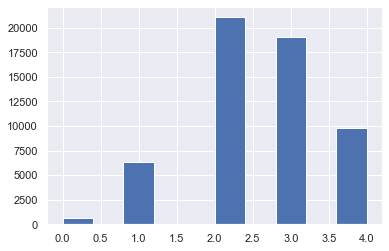

In [10]:
plt.hist(data.education)

# wr 데이터에 Q_A 데이터합을 곱해서 새로운 컬럼 wrsum을 만들었다!

In [11]:
ads = data.iloc[:,-13:].apply(lambda x: 56915- x.value_counts()[1])
df =pd.DataFrame()
for num,i in enumerate(ads):
    df[ads.index.values[num]] = data.iloc[:,-13:].iloc[:,num]*i
data['wrsum'] = df.sum(axis = 1)

In [12]:
data[data.education != 0][['wrsum','education']].corr()

,wrsum,education
wrsum,1.000000,0.252721
education,0.252721,1.000000


# 결과는 별로! 0.252721

In [13]:
nodata = data[data.education == 0]

In [14]:
indata = data[data.education != 0]

# wr 데이터의 합을 하여 새로운 컬럼 생성 : wrsums

In [15]:
indata['wrsums']=indata.iloc[:,61:77].sum(axis = 1)

# 결과는 아래 나오지만 별로였다. 0.164140

In [16]:
nodata.shape,indata.shape

((650, 78), (56261, 79))

In [19]:
indata = pd.concat([indata,pd.get_dummies(indata['age_group'])],axis=1)

In [20]:
indata

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_13,wrsum,wrsums,+70s,10s,20s,30s,40s,50s,60s
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,1,24924,7,0,0,0,1,0,0,0
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,32341,8,0,0,1,0,0,0,0
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,94260,11,0,0,0,1,0,0,0
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,1,15507,5,0,0,1,0,0,0,0
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,121453,12,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,1,48827,9,0,0,1,0,0,0,0
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,211917,15,0,1,0,0,0,0,0
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,1,93858,12,0,0,0,1,0,0,0
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,0,73132,8,0,0,0,0,1,0,0


# 연령이 object 데이터라 숫자 데이터로 바꾸어보았다 !! 새로운 컬럼 생성 agenum

In [21]:
indata['agenum'] = indata['age_group'].map({'30s':30, '20s':20, '40s':40, '50s':50, '10s':10, '60s':60, '+70s':70})

# 아래에 나오지만 효과는 좋았다. corr = 0.44

In [22]:
indata['age_group'].unique()

array(['30s', '20s', '40s', '50s', '10s', '60s', '+70s'], dtype=object)

In [23]:
indata['sex'] = indata['gender'].map({'Male':1,'Female':0})

In [24]:
indata

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wrsums,+70s,10s,20s,30s,40s,50s,60s,agenum,sex
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,7,0,0,0,1,0,0,0,30,0
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,8,0,0,1,0,0,0,0,20,0
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,11,0,0,0,1,0,0,0,30,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,5,0,0,1,0,0,0,0,20,0
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,12,0,0,1,0,0,0,0,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,9,0,0,1,0,0,0,0,20,0
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,15,0,1,0,0,0,0,0,10,0
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,12,0,0,0,1,0,0,0,30,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,8,0,0,0,0,1,0,0,40,0


# 질문 계산법을 이용해서 데이터를 만들었다 qa

In [26]:
indata[["QeA", "QfA", "QkA", "QqA", "QrA","QaA", "QdA", "QgA", "QiA", "QnA"]] = 6-indata[["QeA", "QfA", "QkA", "QqA", "QrA","QaA", "QdA", "QgA", "QiA", "QnA"]]

In [27]:
qa=indata.iloc[:,1::2]
indata['qa'] = qa.iloc[:,:20].sum(axis = 1)

In [33]:
indata.corr()['education'][indata.corr()['education']>0.4]

education    1.000000
agenum       0.444194
Name: education, dtype: float64

In [175]:
indata.corr()['education'][indata.corr()['education']>0]

QaE          0.006029
QeE          0.005225
QfE          0.005458
QiE          0.001949
QlE          0.002091
QnE          0.006224
QoE          0.003523
QrE          0.003099
QsE          0.005373
education    1.000000
engnat       0.140881
married      0.260888
tp02         0.106205
tp04         0.072525
tp06         0.053688
tp08         0.151071
tp10         0.030206
wf_03        0.014124
wr_01        0.115594
wr_02        0.015937
wr_03        0.229388
wr_04        0.049212
wr_05        0.076917
wr_06        0.198968
wr_08        0.006034
wr_09        0.155082
wr_10        0.026861
wr_11        0.139968
wr_12        0.050607
wr_13        0.033522
wrsum        0.252721
wrsums       0.164140
+70s         0.035735
20s          0.214452
30s          0.213664
40s          0.167680
50s          0.115171
60s          0.080498
agenum       0.444194
QaE          0.088958
QbE          0.035864
QcE          0.071197
QdE          0.064645
QeE          0.058167
QfE          0.097537
QgE       

# 결과는 미미했다! 0.4 이하!

In [36]:
indata.drop(columns ='index' ,inplace = True)

In [46]:
indata = pd.concat([indata,np.log1p(indata.iloc[:,1::2].iloc[:,:20])],axis = 1)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
x = indata[['10s','wrsum','agenum']]
x

,10s,wrsum,agenum
0,0,24924,30
1,0,32341,20
2,0,94260,30
3,0,15507,20
4,0,121453,20
...,...,...,...
11378,0,48827,20
11379,1,211917,10
11380,0,93858,30
11381,0,73132,40


In [30]:
y = indata['education']
y

0        2
1        4
2        3
3        4
4        3
        ..
11378    3
11379    2
11380    4
11381    2
11382    4
Name: education, Length: 56261, dtype: int64

In [73]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=11)

In [74]:
rf = RandomForestClassifier(n_estimators=1000) #,min_samples_leaf=4,max_depth=7,criterion='entropy'
# rf.fit(xtrain,ytrain)
# ypred = rf.predict(xtest)

In [75]:
param_range1 = list(range(3,6))
param_range2 = list(range(1,5))

param_grid = [{'max_depth':param_range1,'min_samples_split':param_range2}] 
gs1 =  GridSearchCV(rf,param_grid= param_grid,cv= 10,n_jobs= -1)
gs1.fit(xtrain,ytrain)
print(gs1.best_params_)

{'max_depth': 5, 'min_samples_split': 4}


In [76]:
knn = KNeighborsClassifier(n_jobs = -1,metric = 'minkowski')

In [64]:
param_range1 = list(range(1,11)) 
param_range2 = list(range(1,5))

param_grid = [{'n_neighbors':param_range1,'p':param_range2}] 

gs2 =  GridSearchCV(knn,param_grid= param_grid,cv= 10,n_jobs= -1)
gs2.fit(xtrain,ytrain)
print(gs2.best_params_)

{'n_neighbors': 9, 'p': 1}


In [65]:
from sklearn.ensemble import VotingClassifier

In [89]:
rfs = RandomForestClassifier(n_estimators=1000, max_depth =  5,min_samples_split = 3,random_state = 11)
knns =KNeighborsClassifier(n_neighbors = 9, p = 1, n_jobs = -1,metric = 'minkowski')
voting_estimator = [('rfs',rfs),('knns',knns)]
voting = VotingClassifier(estimators=voting_estimator,n_jobs=-1)
y_pred = voting.fit(xtrain,ytrain).predict(xtest)

In [90]:
(y_pred == ytest).sum()

8165

In [91]:
(y_pred == ytest).sum()/y_pred.shape[0]

0.4837371882220511

# 정확도가 50%!!! 부정확하다!!

# education과 상관계수가 높은 데이터 컬럼 몇개 뽑아서 랜덤으로 넣자!
# 랜덤 확률은 컬럼에서 데이터 개수가 많은 게 확률이 높게 지정한다! 
# 연령 0.444194 결혼 유무 0.260888 모국어 여부 0.140881

In [51]:
train.shape,test.shape

((45532, 77), (11383, 77))

In [52]:
raw_data = pd.concat([train,test])

In [53]:
raw_data.shape

(56915, 77)

In [55]:
educationdata = raw_data['education'].copy()

In [58]:
(educationdata == 0).sum()

650

In [59]:
raw_data.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [78]:
# 연령대 -> 영어 -> 결혼 
zerodata = raw_data[raw_data['education']==0].copy()
nonzerodata = raw_data[raw_data['education'] != 0].copy()

In [121]:
groupnon = nonzerodata.groupby(['age_group','engnat','married','education']).size()
groupnon.head()

age_group  engnat  married  education
+70s       0       2        3            1
           1       0        4            1
                   1        1            2
                            2            5
                            3            4
dtype: int64

In [129]:
groupall = nonzerodata.groupby(['age_group','engnat','married']).size()
groupall

age_group  engnat  married
+70s       0       2            1
           1       0            1
                   1           16
                   2          163
                   3           98
                             ... 
60s        1       3          414
           2       0            1
                   1           12
                   2           73
                   3           25
Length: 71, dtype: int64

In [139]:
groupper = groupnon / groupall
groupper # '+70s'

age_group  engnat  married  education
+70s       0       2        3            1.000000
           1       0        4            1.000000
                   1        1            0.125000
                            2            0.312500
                            3            0.250000
                                           ...   
60s        2       2        3            0.369863
                            4            0.342466
                   3        2            0.240000
                            3            0.200000
                            4            0.560000
Length: 228, dtype: float64

In [131]:
groupper.index

MultiIndex([('+70s', 0, 2, 3),
            ('+70s', 1, 0, 4),
            ('+70s', 1, 1, 1),
            ('+70s', 1, 1, 2),
            ('+70s', 1, 1, 3),
            ('+70s', 1, 1, 4),
            ('+70s', 1, 2, 1),
            ('+70s', 1, 2, 2),
            ('+70s', 1, 2, 3),
            ('+70s', 1, 2, 4),
            ...
            ( '60s', 2, 1, 2),
            ( '60s', 2, 1, 3),
            ( '60s', 2, 1, 4),
            ( '60s', 2, 2, 1),
            ( '60s', 2, 2, 2),
            ( '60s', 2, 2, 3),
            ( '60s', 2, 2, 4),
            ( '60s', 2, 3, 2),
            ( '60s', 2, 3, 3),
            ( '60s', 2, 3, 4)],
           names=['age_group', 'engnat', 'married', 'education'], length=228)

In [160]:
num = len(zerodata)
na = []
for i in range(num):
    ll = list(zerodata[['age_group','engnat','married']].values[i])
    
    try:
        per = list(groupper[ll[0],ll[1],ll[2]].values)
        number = list(groupper[ll[0],ll[1],ll[2]].index)
    except Exception as e:
        print(i, e)
        per = [0.25,0.25,0.25,0.25]
        number = [1,2,3,4]
    na.append(np.random.choice(number,p=per))
    
zerodata['education'][zerodata['education'] == 0] = na
#zerodata[['age_group','engnat','married']].values

In [162]:
zerodata['education'].value_counts()

3    235
2    223
4    131
1     61
Name: education, dtype: int64

In [165]:
datas = pd.concat([zerodata,nonzerodata])
datas.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
113,113,3.0,749,3.0,539,4.0,487,2.0,937,3.0,...,1,1,0,1,1,0,1,0,1,1
262,262,1.0,402,4.0,1117,4.0,676,1.0,1056,1.0,...,1,1,0,1,1,0,1,0,1,1
439,439,3.0,395,4.0,1700,1.0,664,2.0,562,3.0,...,1,0,0,1,1,0,1,0,1,1
537,537,1.0,456,5.0,1515,4.0,1312,2.0,3694,5.0,...,1,1,0,1,1,0,1,1,1,1
715,715,1.0,275,5.0,1307,4.0,861,1.0,615,5.0,...,1,1,1,1,1,0,1,0,1,1


In [167]:
datas['education'].value_counts()

2    21294
3    19260
4     9948
1     6413
Name: education, dtype: int64